In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 14})

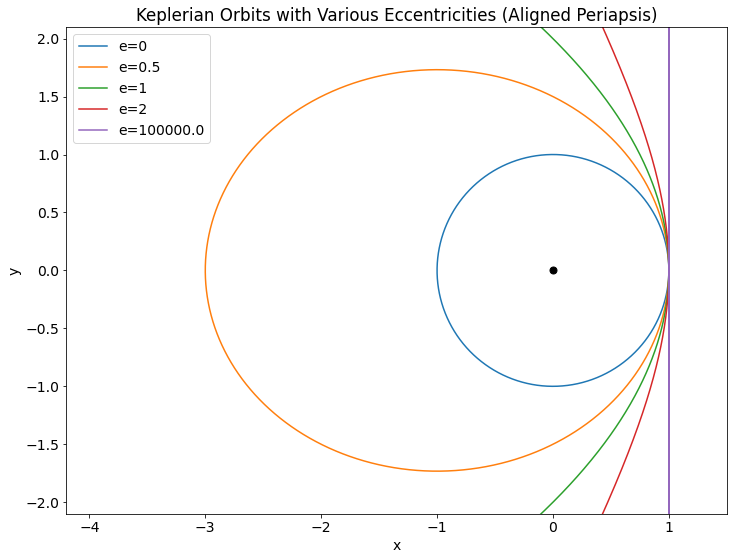

In [44]:
# Set the plotting range based on the size of the orbit with e=0.5

# Define the theta, eccentricities, and periapsis 
theta = np.linspace(0, 2 * np.pi, 10000)
eccentricities = [0, 0.5, 1, 2, 1e+5]
periapsis = 1.0  # Set periapsis for all orbits 5at 1 unit distance

# Function to compute the radial distance r for a given eccentricity and angle with periapsis aligned
def kepler_orbit_with_periapsis(e, theta, periapsis):
    return periapsis * (1 + e) / (1 + e * np.cos(theta))


# First, calculate the orbit size for e=0.5 to determine the plotting range
e_range_orbit = 0.5  # Orbit with eccentricity 0.5

# Compute the radial distance for the e=0.5 orbit over the entire theta range
r_0_5 = kepler_orbit_with_periapsis(e_range_orbit, theta, periapsis)

# Find the maximum, minimum radial distance for the orbit with e=0.5
r_max = np.max(r_0_5)
r_min = np.min(r_0_5)

# Define the plotting limits based on this maximum radial distance
plot_range = 1.4 * r_max  # Slightly larger range for better visibility

# Now, plot the orbits again with the updated plot range
plt.figure(figsize=(15, 8))

for e in eccentricities:
    if e < 1:
        r = kepler_orbit_with_periapsis(e, theta, periapsis)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        plt.plot(x, y, label=f'e={e}')  # Plot for bound orbits
    elif e >= 1:
        # Hyperbolic orbit (e>1), plot only on the right side
        theta_range = np.linspace(-0.6*np.pi, 0.6*np.pi, 500)
        r = kepler_orbit_with_periapsis(e, theta_range, periapsis)
        x = r * np.cos(theta_range)
        y = r * np.sin(theta_range)
        plt.plot(x, y, label=f'e={e}')

# Set the plotting limits based on the size of the e=0.5 orbit
plt.xlim(-plot_range, 1.5*r_min)
plt.ylim(-0.5*plot_range, 0.5*plot_range)

plt.plot(0, 0, 'o', color='black', markersize=7, zorder=5)  # 'o' is for a filled circle marker

# Labels and legend
plt.title('Keplerian Orbits with Various Eccentricities (Aligned Periapsis)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

# Save the figure
plt.savefig("../Figures/kepler_bound_and_unbound.png", format="png", dpi=300, transparent=False, facecolor='white')

plt.show()
